In [1]:
using Plots, LaTeXStrings
using Plots.PlotMeasures
empty!(ARGS)
push!(ARGS, "G:/Hamburg/b20.0_mu0.4/lDGAConfig.toml")
include(joinpath(@__DIR__,"../examples/example00_lDGA.jl"))

using LaTeXStrings

  Activating project at `G:\Codes\LadderDGA.jl`
[ Info: Precompiling LadderDGA [78e40beb-bf89-4c0e-9d2b-bee278912f2b] (cache misses: include_dependency fsize change (18))


[ Info: Reading Inputs...
[ Info: Setting up calculation for kGrid 2Dsc-0.25-0.05-0.025 of size 10


DBG: NOT using diagonal terms in λ₀


┌ Info: Inputs Read. Starting Computation.
│     Local susceptibilities with ranges are:
│     χLoc_m(1:301) = 0.3838, χLoc_d(1:301) = 0.1017
│     sum χupup check (plain ?≈? tail sub ?≈? imp_dens ?≈? n/2 (1-n/2)): 0.2401531297823682 ?=? 0.2427835212727256 ?≈? 0.2427835212727254 ≟ 0.24275850716113093"
│ Local EoM check for the first 5 frequencies: 0.0033, 0.0033, 0.0033, 0.0033, 0.0033  
└     
[ Info: m channel: |∑χ(q=0,ω≠0)| = 0.005219445084 ≟ 0
[ Info: d channel: |∑χ(q=0,ω≠0)| = 0.004454577569 ≟ 0


DBG: NOT using diagonal terms in λ₀


In [2]:
mP = lDGAhelper.mP
kG = lDGAhelper.kG
U = mP.U
nden = mP.n
beta = mP.β
lim_se = U^2 * (nden/2) * (1 - nden/2)
se_tmp = calc_Σ(χm, γm, χd, γd, λ₀, lDGAhelper);

xr = collect(axes(se_tmp,2))
iν_arr = LadderDGA.iν_array(beta, xr)
gimp = lDGAhelper.gImp[1,xr];

In [8]:
xm = maximum( - 1 ./ χm[:,151])

-0.05936114227095651

In [9]:
xm = - 1 / maximum( χm[:,151])

-0.05936114227095651

In [3]:
res_dm_tsc2 =  LadderDGA.LambdaCorrection.λdm_tsc_correction_clean(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,verbose=true,max_steps_sc=100,mixing=0.8)

LoadError: MethodError: no method matching λdm_tsc_correction_clean(::χT, ::γT, ::χT, ::γT, ::Array{ComplexF64, 3}, ::lDΓAHelper; tc::DataType, verbose::Bool, max_steps_sc::Int64, mixing::Float64)
This error has been manually thrown, explicitly, so the method may exist but be intentionally marked as unimplemented.

[0mClosest candidates are:
[0m  λdm_tsc_correction_clean(::χT, ::γT, ::χT, ::γT, ::Array{ComplexF64, 3}, ::Any; use_trivial_λmin, validation_threshold, max_steps_m, max_steps_dm, max_steps_sc, log_io, tc)[91m got unsupported keyword arguments "verbose", "mixing"[39m
[0m[90m   @[39m [35mLadderDGA[39m [90mG:\Codes\LadderDGA.jl\src\LambdaCorrection\[39m[90m[4mlambda_tsc_correction.jl:36[24m[39m


In [5]:
res_dm_tsc =  LadderDGA.LambdaCorrection.λdm_tsc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,verbose=true,verbose_sc=false,max_steps_sc=200,mixing=0.1)

┌ Warning: internal tsc did not converge
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_tsc_correction.jl:165
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Error: Kinetic energy not finite! Aborting λ-tsc
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_tsc_correction.jl:279
┌ Warning: internal tsc did not converge
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_tsc_correction.jl:165
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Error: Kinetic energy not finite! Aborting λ-tsc
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_tsc_correction.jl:279
┌ Warning: internal tsc did not converge
└ @ LadderDGA.LambdaCorrection 

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_tscCorrectio... ───────╮
│  λm = 0.00000000, λd = NaN, μ = 1.88566558                                   │
│  n      =  0.64772569,  n DMFT  =  0.82980608,  Δ = 12.3233%                 │
│  PP_1   =  0.24275851,  PP_2    =  0.32662767,  Δ = 14.7298%                 │
│  Epot_1 =  0.12434717,  Epot_2  =  0.01905795,  Δ = 73.4208%                 │
│  Ekin_1 =  -0.28649681,  Ekin_2  = -0.28649681,  Δ = 0.0000%                 │
│  χ_m    =  0.48924323,  χ_m_loc = 0.38383441,  Δ = 12.0732%                  │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


# EPot Condition

In [3]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 40
xr_dm_01, fr_dm_01 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Plain)
xr_dm_02, fr_dm_02 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_Full)
xr_dm_03, fr_dm_03 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.01}, λmax=λd_max);
xr_dm_04, fr_dm_04 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.1}, λmax=λd_max);
#xr_dm_05, fr_dm_05 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.15}, λmax=λd_max);
xr_dm_06, fr_dm_06 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=40, λmin=λd_min_sample, tc=ΣTail_ExpStep{0.5}, λmax=λd_max);
xr_dm_07, fr_dm_07 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper;maxit=Nit, λmin=λd_min_sample, tc=ΣTail_ExpStep{1.0}, λmax=λd_max);
xr_dm_08, fr_dm_08 = LadderDGA.LambdaCorrection.EPotCond_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Warning: improved (true) μ determination failed with Roots.ConvergenceFailed("Algorithm failed to converge")
└ @ LadderDGA G:\Codes\LadderDGA.jl\src\GFTools.jl:307
┌ Wa

In [9]:
se_full_list = []
EP1_full_list = []
EP2_list = []
se_eom_list = []
EP1_eom_list = []
se_plain_list = []
EP1_plain_list = []
se_delta_list = []
EP1_delta_list = []
for λd in xr_dm_01  
    rhs,PP_p1 = LadderDGA.LambdaCorrection.λm_rhs(χm, χd, lDGAhelper, λd=λd)
    λm  = LadderDGA.LambdaCorrection.λm_correction_val(χm, rhs, lDGAhelper)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Full, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    Epot_2 = EPot_p2(χm, χd, λm, λd, lDGAhelper.mP.n, lDGAhelper.mP.U, lDGAhelper.kG)
    push!(se_full_list,se_tmp)
    push!(EP1_full_list,Epot_1)
    push!(EP2_list,Epot_2)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_Plain, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_plain_list,se_tmp)
    push!(EP1_eom_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_EoM, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_eom_list,se_tmp)
    push!(EP1_plain_list,Epot_1)
    μ_new, G_ladder, se_tmp = calc_G_Σ(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper; tc=ΣTail_ExpStep{0.5}, fix_n = true)
    Ekin_1, Epot_1 = calc_E(G_ladder, se_tmp, μ_new, lDGAhelper.kG, lDGAhelper.mP)
    push!(se_delta_list,se_tmp)
    push!(EP1_delta_list,Epot_1)
end

LoadError: UndefVarError: `xr_dm_01` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [10]:
p1 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.15,.15), xlims=(λd_min_sample,λd_max), legend=nothing, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p1, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p1, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p1, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p1, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p1, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p1, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)

p2 = plot(xr_dm_01, fr_dm_01, size=(800,500), linewidth=2, ylims=(-.05,.05), xlims=(1.9599,1.960), legend=:outerright, ylabel=L"\Delta E_\mathrm{pot}", xlabel=L"\lambda_d", label=L"\mathrm{plain}",
    xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(p2, xr_dm_02, fr_dm_02, label=L"\mathrm{full}", markershape=:auto)
plot!(p2, xr_dm_08, fr_dm_08, label=L"\mathrm{EoM}", markershape=:auto)
plot!(p2, xr_dm_03, fr_dm_03, label=L"\mathrm{step}, \delta=0.01", markershape=:auto)
plot!(p2, xr_dm_04, fr_dm_04, label=L"\mathrm{step}, \delta=0.1", markershape=:auto)
plot!(p2, xr_dm_06, fr_dm_06, label=L"\mathrm{step}, \delta=0.5", markershape=:auto)
plot!(p2, xr_dm_07, fr_dm_07, label=L"\mathrm{step}, \delta=1.0", markershape=:auto)
hline!([0.0], label=nothing, ls=:dash, lw=2)
p = plot(p1, p2, size=(1400,400), left_margin=8mm, bottom_margin=10mm)
savefig("delta_expstep_comparison_mu04.pdf")
display(p)

LoadError: UndefVarError: `λd_min_sample` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

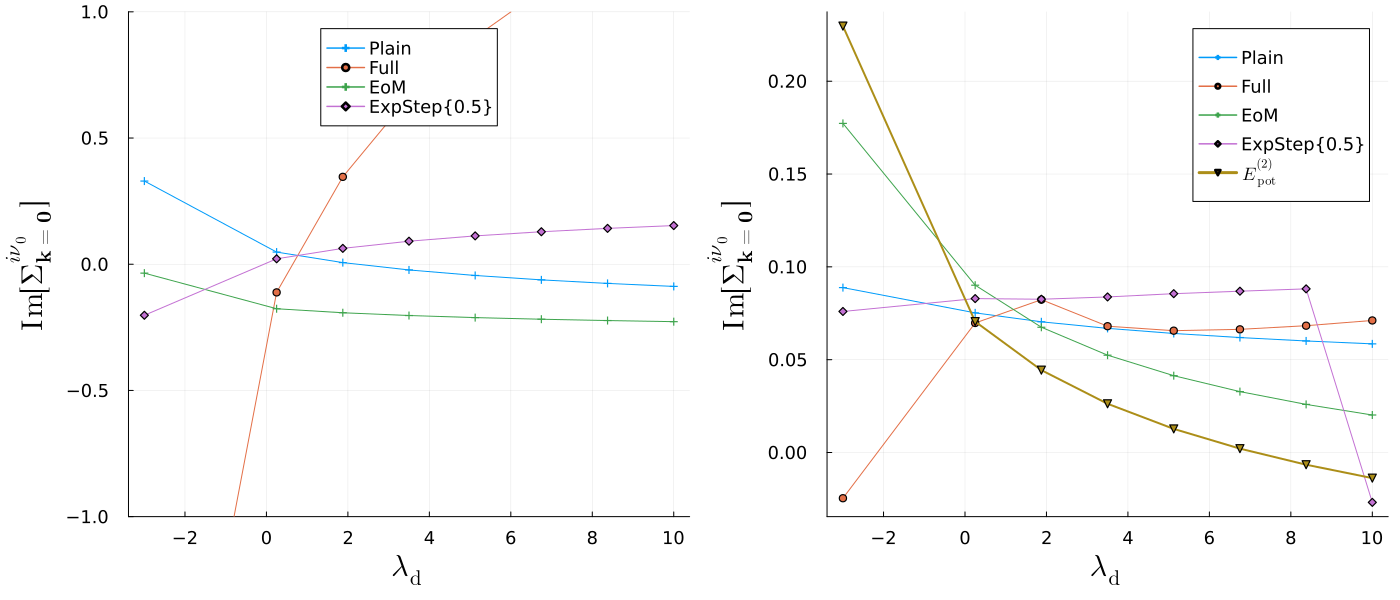

In [6]:
p1 = plot(xr_dm_01, map(x->imag(x[1,0]), se_plain_list),markershape=:auto, label="Plain")
plot!(xr_dm_01, map(x->imag(x[1,0]), se_full_list),ylims=(-1,1),markershape=:auto, label="Full", legend=:top,
        xlabel=L"\lambda_\mathrm{d}", ylabel=L"\mathrm{Im} [\Sigma^{i\nu_0}_{\mathbf{k}=\mathbf{0}}]",
        xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr_dm_01, map(x->imag(x[1,0]), se_eom_list),markershape=:auto, label="EoM")
plot!(xr_dm_01, map(x->imag(x[1,0]), se_delta_list),markershape=:auto, label="ExpStep{0.5}")
p2 = plot(xr_dm_01, EP1_plain_list,markershape=:auto, label="Plain")
plot!(xr_dm_01, EP1_full_list,markershape=:auto, label="Full", legend=:topright,
        xlabel=L"\lambda_\mathrm{d}", ylabel=L"\mathrm{Im} [\Sigma^{i\nu_0}_{\mathbf{k}=\mathbf{0}}]",
        xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12)
plot!(xr_dm_01, EP1_eom_list,markershape=:auto, label="EoM")
plot!(xr_dm_01, EP1_delta_list,markershape=:auto, label="ExpStep{0.5}")
plot!(xr_dm_01, EP2_list, lw=2 ,label=L"E^{(2)}_{\mathrm{pot}}", markershape=:auto)

plot(p1,p2, size=(1400,600), left_margin=10mm, bottom_margin=10mm)

In [3]:
res_dm2 =  λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

LoadError: ArgumentError: The interval [a,b] is not a bracketing interval.
You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
Consider a different bracket or try fzero(f, c) with an initial guess c.



In [4]:
νmax = LadderDGA.eom_ν_cutoff(lDGAhelper.sP)
νGrid = 0:(νmax-1)
view(res_dm_sc.G_ladder,:,νGrid), view(res_dm_sc.Σ_ladder,:,νGrid)
calc_E(res_dm_sc.G_ladder, res_dm_sc.Σ_ladder, res_dm_sc.μ, lDGAhelper.kG, lDGAhelper.mP)

LoadError: UndefVarError: `res_dm_sc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
EPot_p2(χm, χd, res_dm_sc.λm, res_dm_sc.λd, res_dm_sc.n, lDGAhelper.mP.U, lDGAhelper.kG)

LoadError: UndefVarError: `res_dm_sc` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [13]:
lDGAhelper.mP.Epot_1Pt

0.06319681227196039

In [12]:
res_dm =  LadderDGA.LambdaCorrection.λdm_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.03473254, λd = -1.19910209, μ = 0.31348461                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.08305480,  Epot_2  =  0.08305480,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27820029,  Ekin_2  = -0.26047556,  Δ = 3.2904%                 │
│  χ_m    =  0.37337564,  χ_m_loc = 0.38383441,  Δ = 1.3812%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [7]:
res_dm_sc =  LadderDGA.LambdaCorrection.λdm_sc_correction_clean(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,verbose=true,max_steps_sc=100,mixing=0.8)

λm=-0.05926716847136933, λd=-4.428666997669931, ΔEPot = -1.524602404962443 - -7.166125200493235 = 5.6415227955307925
λm=-0.017930541665888367, λd=200.0, ΔEPot = 0.04547328185659175 - -0.10717938254437348 = 0.15265266440096523
λm=0.023715674563837587, λd=0.0, ΔEPot = 0.07431244526278379 - 0.05669001729425699 = 0.017622427968526796
┌ Warning: Caught error
│   e =
│    ArgumentError: The interval [a,b] is not a bracketing interval.
│    You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
│    Consider a different bracket or try fzero(f, c) with an initial guess c.
│    
│    
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:90
┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 4 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:91
λm=-0.05878172510218224, λd=-4.428666997669931, ΔEPot = -1.1966599276950163 - 4.174629127696182 = -5.3712890

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03240224, λd = -0.99672038, μ = 0.29118061                           │
│  n      =  0.82980607,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07780573,  Epot_2  =  0.07780571,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27125434,  Ekin_2  = -0.26047556,  Δ = 2.0271%                 │
│  χ_m    =  0.37600018,  χ_m_loc = 0.38383441,  Δ = 1.0310%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [8]:
res_dm_sc =  λdm_sc_correction(χm,γm,χd, γd,λ₀, lDGAhelper; tc=ΣTail_EoM,verbose=true,max_steps_sc=100,mixing=0.8)

λm=-0.05929756333577599, λd=-4.428666997669947, ΔEPot = -1.465945661106545 - -13.245698032523073 = 11.779752371416528
λm=-0.017930541665888387, λd=200.0, ΔEPot = 0.045473281856591684 - -0.10717938254437331 = 0.152652664400965
λm=0.023715674563837476, λd=0.0, ΔEPot = 0.07431244526278376 - 0.05669001729425699 = 0.01762242796852677
┌ Warning: Caught error
│   e =
│    ArgumentError: The interval [a,b] is not a bracketing interval.
│    You need f(a) and f(b) to have different signs (f(a) * f(b) < 0).
│    Consider a different bracket or try fzero(f, c) with an initial guess c.
│    
│    
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:157
┌ Warning: Roots.find_zero sometimes failes due to numerical instability. Reseting 4 more times
└ @ LadderDGA.LambdaCorrection G:\Codes\LadderDGA.jl\src\LambdaCorrection\lambda_sc_correction.jl:158
λm=0.060743817209292485, λd=-4.428666997669947, ΔEPot = -1.0197162970956866 - 7.0093688383310155 = -8.02908

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dm_scCorrection... ───────╮
│  λm = 0.03240224, λd = -0.99672037, μ = 0.29118067                           │
│  n      =  0.82980607,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.07780572,  Epot_2  =  0.07780571,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27125437,  Ekin_2  = -0.26047556,  Δ = 2.0271%                 │
│  χ_m    =  0.37600018,  χ_m_loc = 0.38383441,  Δ = 1.0310%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [9]:
λm_t =  0.03473265
λd_t = -1.19910119
trtr = []

converged, μ_it, G_ladder_it, Σ_ladder_it, tr = run_sc(χm, γm, χd, γd, λ₀, λm_t, λd_t, lDGAhelper;
                maxit=500, mixing=0.3, mixing_start_it=10,
                conv_abs=1e-8, tc = ΣTail_EoM, trace=true, verbose=true);

It = 2[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 3[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 4[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 5[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 6[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 7[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 8[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 9[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 10[λm=0.03473265/λd=-1.19910119]: Δit=NaN
It = 11[λm=0.03473265/λd=-1.19910119]: Δit=9.072647288258704e-8
It = 12[λm=0.03473265/λd=-1.19910119]: Δit=2.8623861621948368e-8
It = 13[λm=0.03473265/λd=-1.19910119]: Δit=7.403329904446314e-9


In [9]:
trtr = []
res_dm_sc, newton_trace   = λdm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; tc=ΣTail_EoM, validation_threshold=1e-4, verbose=true, max_steps_m = 1000, max_steps_dm = 20, max_steps_sc=20, newton_mode_secular=true)

LoadError: UndefVarError: `ΣTail_EoM` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [5]:
converged, μ_it, G_ladder_it, Σ_ladder_it, tr = run_sc(χm, γm, χd, γd, λ₀, λm, λd, lDGAhelper, tc=ΣTail_EoM,validation_threshold=1e-4, );

LoadError: UndefVarError: `λm` not defined in `Main`
Suggestion: check for spelling errors or missing imports.

In [3]:
λd_min_sample = -3.0# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 20.0
Nit = 20
xr_dm_sc_01, fr_dm_sc_01 = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM)

([-3.0, -1.5625, -0.125, 1.3125, 2.75, 4.1875, 4.90625, 5.625, 7.0625, 7.78125, 8.5, 9.9375, 11.375, 12.8125, 14.25, 15.6875, 16.40625, 17.125, 18.5625, 20.0], [-0.06844439659720424, -0.013149943464680222, 0.01570348161774937, 0.03430823134594645, 0.047632792548101, 0.05780159741052336, 0.06206393078249901, 0.06590158308696942, 0.07255589432901367, 0.07546798899806922, 0.07815209152607233, 0.08294549980250385, 0.08711242023463264, 0.09077909411823863, 0.09403866250752377, 0.09696157934668712, 0.09831429677439205, 0.09960227374870703, 0.10200356261541402, 0.10419966085854367])

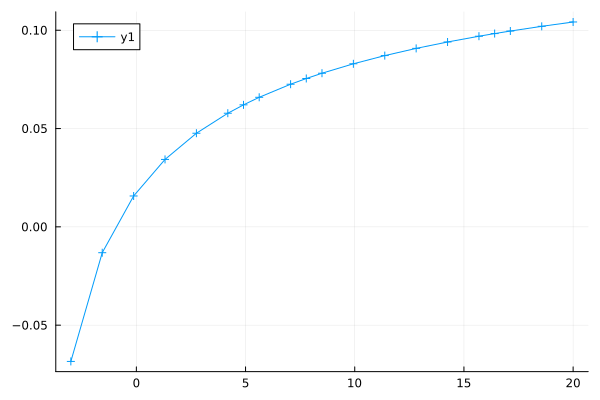

In [4]:
plot(xr_dm_sc_01, fr_dm_sc_01, markershape=:auto)

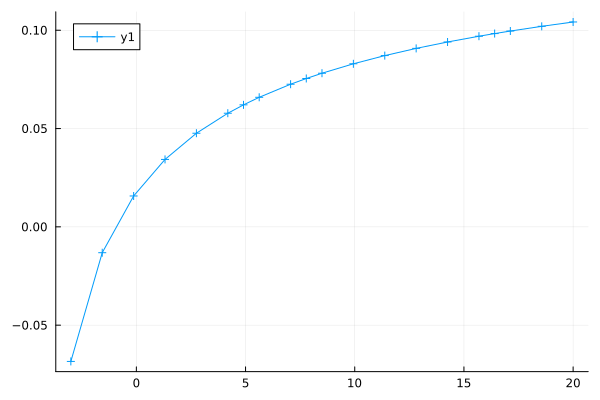

In [32]:
plot(xr_dm_sc_01, fr_dm_sc_01, markershape=:auto)

In [28]:
LadderDGA.to

────────────────────────────────────────────────────────────────────
                           Time                    Allocations      
                  ───────────────────────   ────────────────────────
Tot / % measured:      1243s /   8.4%            172GiB /  42.4%    

Section   ncalls     time    %tot     avg     alloc    %tot      avg
────────────────────────────────────────────────────────────────────
secular        2     101s   97.3%   50.7s   71.1GiB   97.3%  35.5GiB
newton         1    1.84s    1.8%   1.84s   1.33GiB    1.8%  1.33GiB
sc02          13    902ms    0.9%  69.4ms    661MiB    0.9%  50.8MiB
sc09          13    120ms    0.1%  9.27ms   11.0MiB    0.0%   863KiB
sc08          13   2.50ms    0.0%   192μs   83.6KiB    0.0%  6.43KiB
sc04          13   2.06ms    0.0%   158μs   2.31MiB    0.0%   182KiB
sc06          13    991μs    0.0%  76.2μs   3.46MiB    0.0%   273KiB
s              4    123μs    0.0%  30.8μs   1.70KiB    0.0%     436B
sc07          13   76.0μs    0.0%

In [5]:
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc = ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.03473255, λd = -1.19910199, μ = 0.31348461                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.08305481,  Epot_2  =  0.08305481,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27820029,  Ekin_2  = -0.26047556,  Δ = 3.2904%                 │
│  χ_m    =  0.37337563,  χ_m_loc = 0.38383441,  Δ = 1.3812%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [4]:
#res_dm_sc   = λdm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; tc=ΣTail_EoM, verbose=true, validation_threshold=1e-4)

In [5]:
res_dm     = LadderDGA.LambdaCorrection.λdm_correction_clean(χm, γm, χd, γd, λ₀, lDGAhelper, tc = ΣTail_EoM)

╭──── λ-correction (type: LadderDGA.LambdaCorrection.dmCorrection),... ────────╮
│  λm = 0.03473254, λd = -1.19910209, μ = 0.31348461                           │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.08305480,  Epot_2  =  0.08305480,  Δ = 0.0000%                  │
│  Ekin_1 =  -0.27820029,  Ekin_2  = -0.26047556,  Δ = 3.2904%                 │
│  χ_m    =  0.37337564,  χ_m_loc = 0.38383441,  Δ = 1.3812%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [6]:
res_m_sc   = λm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; verbose=true)

It = 2[λm=0.023715674563837566/λd=0.0]: Δit=0.0021500014855975772
It = 3[λm=0.023715674563837566/λd=0.0]: Δit=0.0021944120874626423
It = 4[λm=0.023715674563837566/λd=0.0]: Δit=0.002177112357040518
It = 5[λm=0.023715674563837566/λd=0.0]: Δit=0.0021769158923344565
It = 6[λm=0.023715674563837566/λd=0.0]: Δit=0.0021788393968554384
It = 7[λm=0.023715674563837566/λd=0.0]: Δit=0.0021763481745553826
It = 8[λm=0.023715674563837566/λd=0.0]: Δit=0.0021781313859568314
It = 9[λm=0.023715674563837566/λd=0.0]: Δit=0.0021770975250900563
It = 10[λm=0.023715674563837566/λd=0.0]: Δit=0.0021775995297203237
It = 11[λm=0.023715674563837566/λd=0.0]: Δit=9.900841830532409e-7
It = 12[λm=0.023715674563837566/λd=0.0]: Δit=1.0889749614156684e-7
It = 13[λm=0.023715674563837566/λd=0.0]: Δit=2.2603281105593017e-8
It = 14[λm=0.023715674563837566/λd=0.0]: Δit=2.764731856956319e-9


╭──── λ-correction (type: LadderDGA.LambdaCorrection.m_scCorrection)... ───────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.21392638                            │
│  n      =  0.82980608,  n DMFT  =  0.82980608,  Δ = 0.0000%                  │
│  PP_1   =  0.24275851,  PP_2    =  0.24275851,  Δ = 0.0000%                  │
│  Epot_1 =  0.06917787,  Epot_2  =  0.05669002,  Δ = 9.9214%                  │
│  Ekin_1 =  -0.27781371,  Ekin_2  = -0.26047556,  Δ = 3.2210%                 │
│  χ_m    =  0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                   │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [7]:
λm_t =  0.03473265
λd_t = -1.19910119
trtr = []
converged, μ_it, G_ladder_it, Σ_ladder_it, tr = run_sc(χm, γm, χd, γd, λ₀, λm_t, λd_t, lDGAhelper;
                maxit=500, mixing=0.3, mixing_start_it=10,
                conv_abs=1e-8, tc = ΣTail_EoM, trace=true, verbose=true);

It = 2[λm=0.03473265/λd=-1.19910119]: Δit=0.04612996150914073
It = 3[λm=0.03473265/λd=-1.19910119]: Δit=0.046149205490154104
It = 4[λm=0.03473265/λd=-1.19910119]: Δit=0.0461578710184814
It = 5[λm=0.03473265/λd=-1.19910119]: Δit=0.04615294766305011
It = 6[λm=0.03473265/λd=-1.19910119]: Δit=0.04615496347982028
It = 7[λm=0.03473265/λd=-1.19910119]: Δit=0.04615406490034422
It = 8[λm=0.03473265/λd=-1.19910119]: Δit=0.046154519036580126
It = 9[λm=0.03473265/λd=-1.19910119]: Δit=0.04615427370474151
It = 10[λm=0.03473265/λd=-1.19910119]: Δit=0.046154408877915096
It = 11[λm=0.03473265/λd=-1.19910119]: Δit=9.265484921373293e-7
It = 12[λm=0.03473265/λd=-1.19910119]: Δit=8.062268405820379e-8
It = 13[λm=0.03473265/λd=-1.19910119]: Δit=7.011783372528968e-9


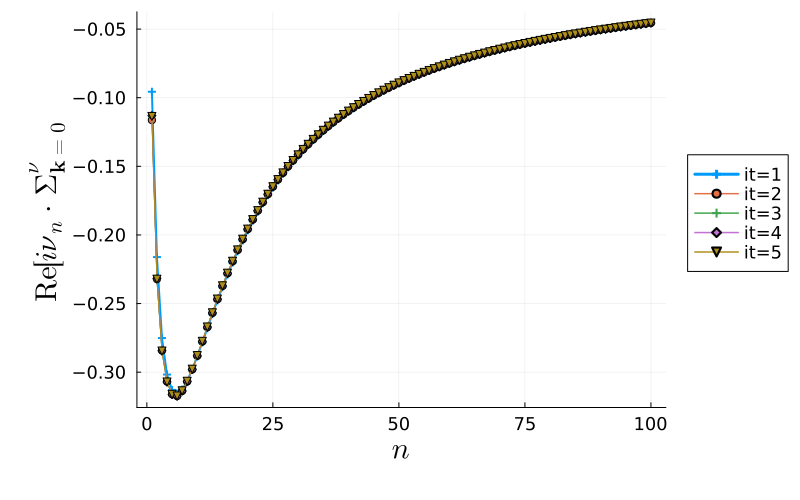

In [8]:
xr = collect(axes(Σ_ladder_it,2))
iν_arr = LadderDGA.iν_array(lDGAhelper.mP.β, xr)
plot(imag(tr[1][1,:].parent), label="it=1", size=(800,500), linewidth=2, legend=:outerright, ylabel=L"\mathrm{Re} [ i\nu_n \cdot \Sigma^{\nu}_{\mathbf{k}=0}", xlabel=L"n", 
                        xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(imag(tr[2][1,:].parent ), label="it=2", markershape=:auto)
plot!(imag(tr[3][1,:].parent), label="it=3", markershape=:auto)
plot!(imag(tr[4][1,:].parent), label="it=4", markershape=:auto)
plot!(imag(tr[5][1,:].parent ), label="it=5", markershape=:auto)

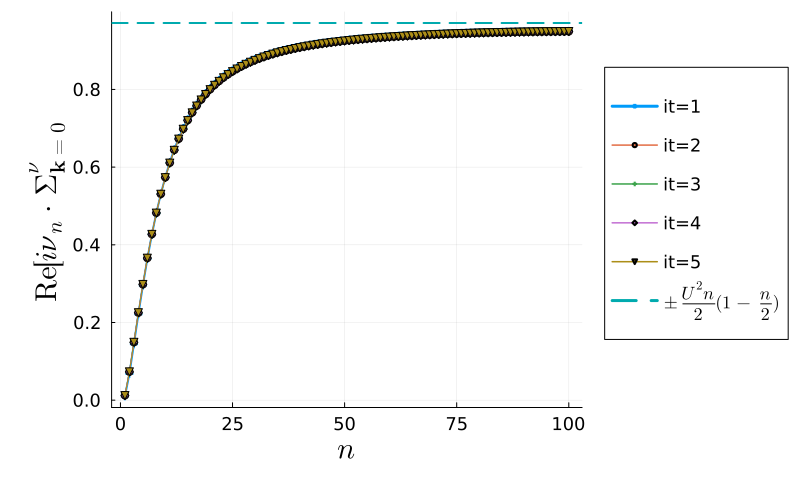

In [9]:
xr = collect(axes(Σ_ladder_it,2))
iν_arr = LadderDGA.iν_array(lDGAhelper.mP.β, xr)
plot(real(tr[1][1,:].parent .* iν_arr), label="it=1", size=(800,500), linewidth=2, legend=:outerright, ylabel=L"\mathrm{Re} [ i\nu_n \cdot \Sigma^{\nu}_{\mathbf{k}=0}", xlabel=L"n", 
                        xtickfontsize=12,ytickfontsize=12,xguidefontsize=20,yguidefontsize=20,legendfontsize=12, markershape=:auto, left_margin = 10mm, bottom_margin=10mm)
plot!(real(tr[2][1,:].parent .* iν_arr), label="it=2", markershape=:auto)
plot!(real(tr[3][1,:].parent .* iν_arr), label="it=3", markershape=:auto)
plot!(real(tr[4][1,:].parent .* iν_arr), label="it=4", markershape=:auto)
plot!(real(tr[5][1,:].parent .* iν_arr), label="it=5", markershape=:auto)
hline!([lim_se], lw=2, ls=:dash, label=L"\pm \frac{U^2n}{2}(1-\frac{n}{2})")

In [23]:
tr[5][1,:] .- tr[1][1,:]

100-element OffsetArray(::Vector{ComplexF64}, 0:99) with eltype ComplexF64 with indices 0:99:
     0.00935447142935164 - 0.01796122392831824im
   -0.007609202703036555 - 0.016073836591250057im
   -0.015160159909192727 - 0.009455580749883341im
   -0.016752872369064864 - 0.005419487557531022im
    -0.01627080512806134 - 0.003176663635125254im
   -0.015147570235604535 - 0.0017913707618837926im
   -0.013905187125102025 - 0.0008544499512062043im
    -0.01272247009173344 - 0.00019541869868822115im
   -0.011650200990291903 + 0.00026923354724611714im
   -0.010691640990580509 + 0.000590860730942im
     -0.0098371149913008 + 0.0008058916878715405im
    -0.00907286082219716 + 0.0009420085292635161im
   -0.008387332936323988 + 0.0010203025361336104im
                         ⋮
  -0.0003981012668062833 + 8.388942174715475e-5im
  -0.0003894109992528261 + 8.250320405932265e-5im
 -0.00038136021815948773 + 8.114552571710648e-5im
 -0.00037319790797396557 + 7.98445198538153e-5im
  -0.0003656586260053496 

-4.42876699766992

In [32]:
λd_min_sample = LadderDGA.LambdaCorrection.get_λ_min(χd)# -4.42876699766992 #LadderDGA.LambdaCorrection.get_λ_min(χd)
λd_max = 10.0
Nit = 20
xr_dm_sc, fr_dm_sc = LadderDGA.LambdaCorrection.EPotCond_sc_curve(χm,γm,χd,γd,λ₀, lDGAhelper; maxit=Nit, λmin=λd_min_sample, λmax=λd_max, tc=ΣTail_EoM);

LoadError: UndefVarError: `converged` not defined in local scope
Suggestion: check for an assignment to a local variable that shadows a global of the same name.

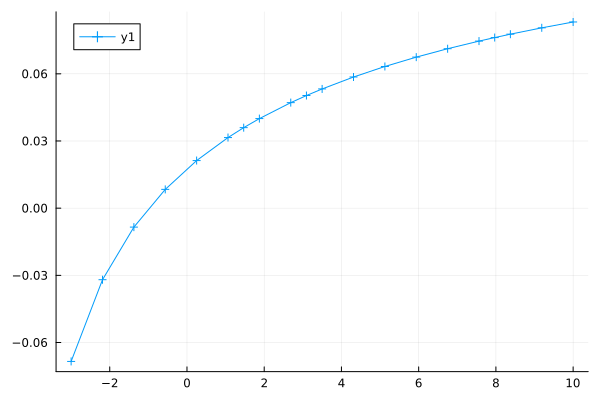

In [29]:
plot(xr_dm_sc, fr_dm_sc,markershape=:auto)

In [6]:
res_m_sc   = λm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_m_sc)


╭──── λ-correction (type: LadderDGA.LambdaCorrection.m_scCorrection)... ───────╮
│  λm = 0.02371567, λd = 0.00000000, μ = 0.21392638, n = 0.81705772            │
│  PP_1   =  0.24275851,  PP_2   =  0.24275851,  Δ = 0.0000%                   │
│  Epot_1 =  0.06917787,  Epot_2 =  0.05669002,  Δ = 9.9214%                   │
│  Ekin_1 = -0.27781371,  Ekin_2 = -0.26047556,  Δ = 3.2210%                   │
│  χ_m = 0.38655803,  χ_m_loc = 0.38383441,  Δ = 0.3535%                       │
│                                                                              │
╰──────────────────────────────────────────────────────────────────────────────╯


In [ ]:
res_dm_sc  = λdm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; validation_threshold=1e-6); print(res_dm_sc)

In [ ]:
res_dm     = LadderDGA.LambdaCorrection.λdm_correction_val_clean(χm, γm, χd, γd, λ₀, lDGAhelper, tc = ΣTail_EoM)

In [ ]:
res_m      = λm_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_m)
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dm)
res_m_sc   = λm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_m_sc)
res_dm_sc  = λdm_sc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; validation_threshold=1e-6); print(res_dm_sc)
res_m_tsc  = λm_tsc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; max_steps_sc = 200, validation_threshold=1e-6); print(res_m_tsc)
res_dm_tsc = λdm_tsc_correction(χm, γm, χd, γd, λ₀, lDGAhelper; max_steps_sc = 200, validation_threshold=1e-6); print(res_dm_tsc)

In [ ]:
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper); print(res_dm)

In [ ]:
res_dm     = λdm_correction(χm, γm, χd, γd, λ₀, lDGAhelper, tc=ΣTail_EoM); print(res_dm)